In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Datasets/CIfar_10 dataset.zip"

In [ ]:
from zipfile import ZipFile

with ZipFile(filepath) as f:
  f.extractall("/content/drive/MyDrive/Colab Notebooks/Datasets/cifar10data")
  print("Data extracted")

Data extracted


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/cifar1.h5")
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 18)          2934      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 18)        

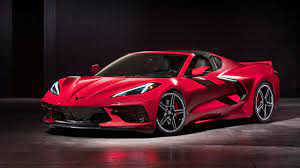

In [11]:
img = Image.open("/content/drive/MyDrive/test.jpeg")
img

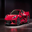

In [13]:
img = img.resize((32,32))
img

In [14]:
test = tf.reshape(np.array(img)/255, (-1,32,32,3))
preds = model.predict(test, verbose=False)[0]*100
preds = tf.math.round(preds)
print(preds)

confidence = tf.reduce_max(preds)
index = int(tf.where(preds == confidence)[0][0])
print(index)

pred = classes[index]

print(pred.title(),int(confidence),"%")

tf.Tensor([12. 10.  8.  9. 10. 10. 10. 13.  8.  9.], shape=(10,), dtype=float32)
7
Horse 13 %
